In [1]:
import numpy as np

In [2]:
!pip install tensorflow

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

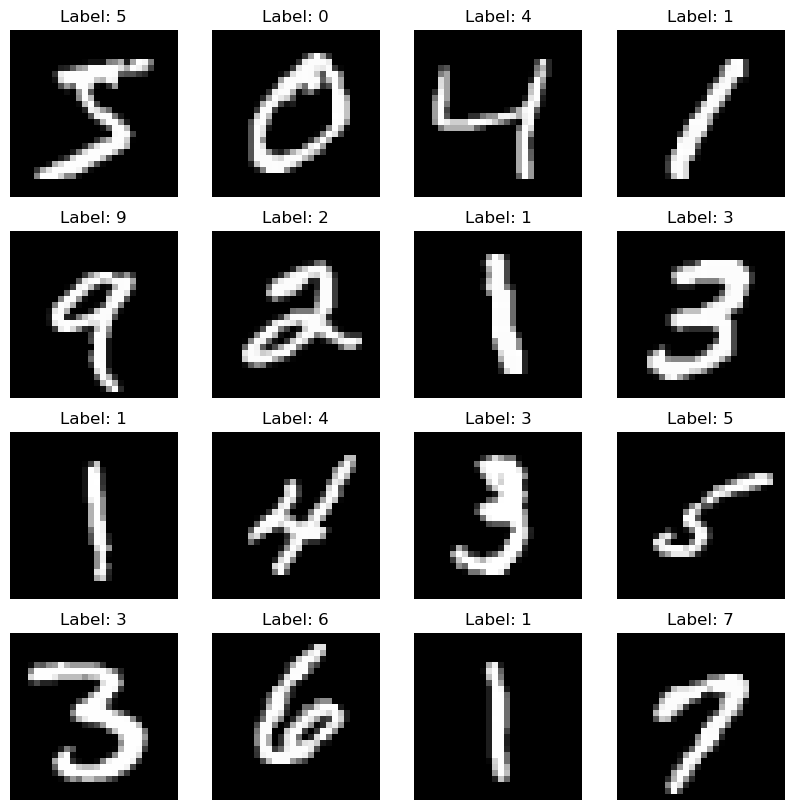

In [5]:
import matplotlib.pyplot as plt

# Display a grid of 16 images with their corresponding labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [6]:
# Reshape and normalize the images
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0

In [7]:
# Convert class labels to one-hot encoded vectors
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [8]:
# Split the training data into training and validation sets
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

D:\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Train the model
model.fit(train_images, train_labels,
          batch_size=32,
          epochs=10,
          validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8885 - loss: 0.3458 - val_accuracy: 0.9796 - val_loss: 0.0650
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9837 - loss: 0.0515 - val_accuracy: 0.9871 - val_loss: 0.0437
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9893 - loss: 0.0331 - val_accuracy: 0.9884 - val_loss: 0.0370
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accuracy: 0.9853 - val_loss: 0.0528
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9940 - loss: 0.0178 - val_accuracy: 0.9910 - val_loss: 0.0348
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9955 - loss: 0.0132 - val_accuracy: 0.9887 - val_loss: 0.0413
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9887 - val_loss: 0.0443
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9976 - loss: 

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9868 - loss: 0.0469
Test accuracy: 0.9905999898910522


In [13]:
# Predict on the test set
predictions = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [14]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1))
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[ 977    0    1    0    0    0    0    1    1    0]
 [   0 1124    0    5    0    0    1    3    2    0]
 [   2    0 1023    2    1    0    0    4    0    0]
 [   0    0    0 1009    0    1    0    0    0    0]
 [   0    0    0    0  973    0    5    1    0    3]
 [   2    0    0    7    0  882    1    0    0    0]
 [   5    3    0    0    2    4  944    0    0    0]
 [   0    2    2    1    0    0    0 1021    1    1]
 [   2    0    2    2    0    2    0    2  963    1]
 [   3    0    1    3    3    5    0    3    1  990]]


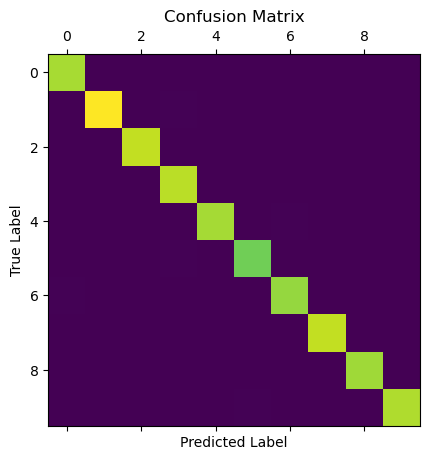

In [15]:
# Visualize the confusion matrix using matplotlib or other libraries
import matplotlib.pyplot as plt

plt.matshow(cm)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()